In [1]:
import numpy as np
import pandas as pd
import random
from faker import Faker 

## Importing the datasets of the cullinary db

In [4]:
Recipe_Details_df = pd.read_csv("CulinaryDB/01_Recipe_Details.csv")
Ingredients_df = pd.read_csv('CulinaryDB/02_Ingredients.csv')  
Compound_Ingredients_df = pd.read_csv('CulinaryDB/03_Compound_Ingredients.csv') 
Ingredients_Aliases_df = pd.read_csv('CulinaryDB/04_Recipe-Ingredients_Aliases.csv')

## Visualizing the datasets

In [7]:
Compound_Ingredients_df.sample(5)

Compound Ingredient Name Compound Ingredient Synonyms  entity_id  \
29         Mixed Vegetables             mixed vegetables       2029   
48                   Phyllo                       phyllo       2048   
78                     Deer                    deer; elk       2078   
62                    Adobo                        adobo       2062   
45      Candied Mixed Fruit          candied mixed fruit       2045   

                               Contituent Ingredients   Category  
29           carrot, cauliflower, corn, pea, capsicum  Vegetable  
48                               phyllo, flour, wheat     Cereal  
78                         mule deer, deer, elk, meat       Meat  
62  cayenne, garlic, cider-vinegar, salt, sugar, c...       Dish  
45         raisin, apricot, date, currant, fig, sugar      Fruit

In [8]:
Ingredients_df.sample(5)

Aliased Ingredient Name   Ingredient Synonyms  Entity ID  Category
189              Musk Melon  musk=melon; honeydew        192     Fruit
779                    Miso                  miso        822  Additive
302                   Olive                 olive        307     Plant
806                Frybread           #fry=bread#        853      Dish
925             Citric Acid           citric acid        998  Additive

In [9]:
Ingredients_Aliases_df.sample(5)

Recipe ID                           Original Ingredient Name  \
323947      32507  1/4 cup plus 2 tablespoons (25 grams) pistachi...   
152492      16800                       4 tablespoons butter, melted   
180911      19573               1/2 pound bacon, cooked and crumbled   
177588      19329                          1 tablespoon tomato paste   
170141      18743                        1 tablespoon garlic, minced   

       Aliased Ingredient Name  Entity ID  
323947              pistachio         439  
152492                 butter          60  
180911                  bacon         278  
177588           tomato paste        2064  
170141                 garlic         259

In [10]:
Recipe_Details_df.sample(5)

Recipe ID                        Title        Source Cuisine
29313      29314                   Dirty Rice  FOOD_NETWORK     USA
2976        2977  Spicy Chinese Chicken Wings    ALLRECIPES   China
45250      45251                 Ham Biscuits    EPICURIOUS     USA
10489      10490    Italiano Chicken and Rice    ALLRECIPES   Italy
14330      14331     Chicken Wild Rice Soup I    ALLRECIPES     USA

## Selecting the required data columns to aggreatget wihh the other dataset that is ingredients_df

In [370]:

c_Ingredients_df = Compound_Ingredients_df[['Compound Ingredient Name','entity_id','Category']]

defining the common columns names from the dataset

In [371]:
ingredients_column_name = ['Ingredient Name','Entity ID','Category']

In [372]:
c_Ingredients_df.columns=ingredients_column_name

In [373]:
c_Ingredients_df

Ingredient Name  Entity ID Category
0                   Garam Masala       2000    Spice
1            Ginger Garlic Paste       2001    Spice
2    Coriander Cumin Seed Powder       2002    Spice
3                   Chaat Masala       2003    Spice
4                  Sambar Powder       2004    Spice
..                           ...        ...      ...
98                        Rabbit       2098     Meat
99                       Haddock       2099     Fish
100                    Persimmon       2100    Fruit
101                  Apple Sauce       2101     Dish
102                Cider Vinegar       2102     Dish

[103 rows x 3 columns]

selecting only the required column form the ingrediets datasets

In [374]:
Ingredients_df = Ingredients_df[['Aliased Ingredient Name','Entity ID','Category']]

assigning the common columns names

In [375]:
Ingredients_df.columns = ingredients_column_name

Merginign the two datasets 

In [376]:

combined_Ingredients_dataset = pd.concat([Ingredients_df, c_Ingredients_df], axis=0, ignore_index=True)

In [377]:
combined_Ingredients_dataset.sample(5),combined_Ingredients_dataset.shape

(     Ingredient Name  Entity ID            Category
 963  Vegetable Stock       2033           Vegetable
 116       Mentha Oil        119       Essential Oil
 8               Beer          9  Beverage Alcoholic
 322         Cardamom        327               Spice
 820         Semolina        869              Cereal,
 (1033, 3))

In [378]:
combined_Ingredients_dataset['Price']=''
dollar_sign = '$'
for index, row in combined_Ingredients_dataset.iterrows():
    combined_Ingredients_dataset.at[index, 'Price'] =  dollar_sign + str(random.randint(1, 20))

In [379]:
combined_Ingredients_dataset['StockQuantity']=''
for index, rows in combined_Ingredients_dataset.iterrows():
    combined_Ingredients_dataset.at[index,'StockQuantity'] = random.randint(1,100)

In [380]:
import nltk

In [382]:
combined_Ingredients_dataset.shape[0]

1033

In [333]:
# combined_Ingredients_dataset.to_csv('ingredients_finalised_dataset.csv')

In [383]:
# Convert values in the specified column of dataset1 to lowercase
combined_Ingredients_dataset['Ingredient Name'] = combined_Ingredients_dataset['Ingredient Name'].str.lower()

In [77]:
# combined_Ingredients_dataset.to_csv('ig_com.csv')

combining the two datasets which have ingredients names and the other with reciepes which have the dish name and ingredients explanation

In [384]:
Recipe_Ingredients_df = pd.merge(Ingredients_Aliases_df,Recipe_Details_df, on='Recipe ID')

In [385]:
Recipe_Ingredients_df.head(2)

Recipe ID Original Ingredient Name Aliased Ingredient Name  Entity ID  \
0          1                 capsicum               capsicum         362   
1          1        green bell pepper            pepper bell         362   

                          Title       Source              Cuisine  
0  5 spice vegetable fried rice  TARLA_DALAL  Indian Subcontinent  
1  5 spice vegetable fried rice  TARLA_DALAL  Indian Subcontinent

Defining the columns name to chose out of the datasets

In [386]:
names = ['Recipe ID','Title','Cuisine','Aliased Ingredient Name']

In [387]:
Recipe_Ingredients_df = Recipe_Ingredients_df[names]

In [388]:
Recipe_Ingredients_df.head(2)

Recipe ID                         Title              Cuisine  \
0          1  5 spice vegetable fried rice  Indian Subcontinent   
1          1  5 spice vegetable fried rice  Indian Subcontinent   

  Aliased Ingredient Name  
0               capsicum   
1            pepper bell

If in case we need merging the datset on  'Entity ID'

In [ ]:

# merged_dataset = pd.merge(Recipe_Ingredients_df, combined_Ingredients_dataset[['Ingredient Name', 'Entity ID']], on='Entity ID', how='left')

# # # Replace 'Entity ID' with 'Aliased Ingredient Name' where available
# # merged_dataset['Entity ID'] = merged_dataset['Aliased Ingredient Name'].fillna(merged_dataset['Entity ID'])

# merged_dataset.head(2)



# merged_dataset.drop('Entity ID',axis=1)


# merged_dataset.to_csv('m_datsets.csv')

In [292]:

# Group by RecipeID and combine Aliased Ingredient Names, Title, and Cuisine into a single row
grouped_dataset = Recipe_Ingredients_df.groupby('Recipe ID').agg({
    'Aliased Ingredient Name': ', '.join,
    'Title': 'first',  # Assumes 'Title' is the same for all rows with the same Recipe ID
    'Cuisine': 'first'  # Assumes 'Cuisine' is the same for all rows with the same Recipe ID
}).reset_index()

In [293]:
grouped_dataset.head(2)

Recipe ID                            Aliased Ingredient Name  \
0          1    capsicum , pepper bell , soy sauce , sunflower    
1          2  buttermilk , cumin , fenugreek , ginger garlic...   

                          Title              Cuisine  
0  5 spice vegetable fried rice  Indian Subcontinent  
1                  aachar aaloo  Indian Subcontinent

In [47]:
# grouped_dataset.to_csv("g_dataset.csv")

In [294]:
# Rename the columns for clarity
grouped_dataset.columns = ['Recipe ID', 'Ingredients', 'Title', 'Cuisine']


In [295]:
grouped_dataset.sample(2)

Recipe ID                                        Ingredients  \
20589      20594  baking powder , baking soda , banana , butter ...   
25069      25076  broccoli , chicken , olive , onion , oregano ,...   

                                               Title    Cuisine  
20589                           Jamaican Coffee Cake  Caribbean  
25069  Saute of Chicken and Broccoli - Italian Style      Italy

## COunting the frequency of each element in the dataset 

In [296]:
# n=0
dict_ingred_count = {}
for value,row in grouped_dataset.iterrows():
    # if n < 2:
    ing_list=row['Ingredients'].split(',')
    for ing in ing_list:
        print(ing.strip())
    # if row['Ingredients']..split(',').strip() == 'capsicum' :
    #     print(row['Ingredients'])
    #     n +=1
        if ing.strip() in dict_ingred_count:
            dict_ingred_count[ing.strip()] += 1
        else:
            dict_ingred_count[ing.strip()] = 1

        # n +=1
    # else:
    #     break


capsicum
pepper bell
soy sauce
sunflower
buttermilk
cumin
fenugreek
ginger garlic paste
mustard oil
nigella seed
pepper bell
potato
sunflower
asafoetida
cayenne
fenugreek
ginger garlic paste
mustard oil
sesame
sunflower
turmeric
butter
cardamom
cashew
cayenne
cinnamon
clove
coriander
corn grit
cumin
potato
raisin
sunflower
tomato
turmeric
curry leaf
lemon
sunflower
coriander
cumin
mint
mustard oil
pepper bell
potato
sunflower
turmeric
asafoetida
cayenne
chickpea
fennel
fenugreek
mustard oil
nigella seed
turmeric
anise
asafoetida
cayenne
fenugreek
mango
mustard oil
nigella seed
sunflower
turmeric
cayenne
coriander
fennel
mango
nigella seed
sunflower
turmeric
buttermilk
mint
mango
mint
asafoetida
cayenne
chickpea
coriander cumin seed powder
mango
mustard oil
sunflower
turmeric
asafoetida
buttermilk
chickpea
curry leaf
fenugreek
mango
mustard oil
pepper bell
sunflower
asafoetida
bay laurel
cayenne
coriander
mustard oil
pea pigeon
sunflower
turmeric
buttermilk
mint
pepper
pomegranate
raisi

In [ ]:
dict_ingred_count

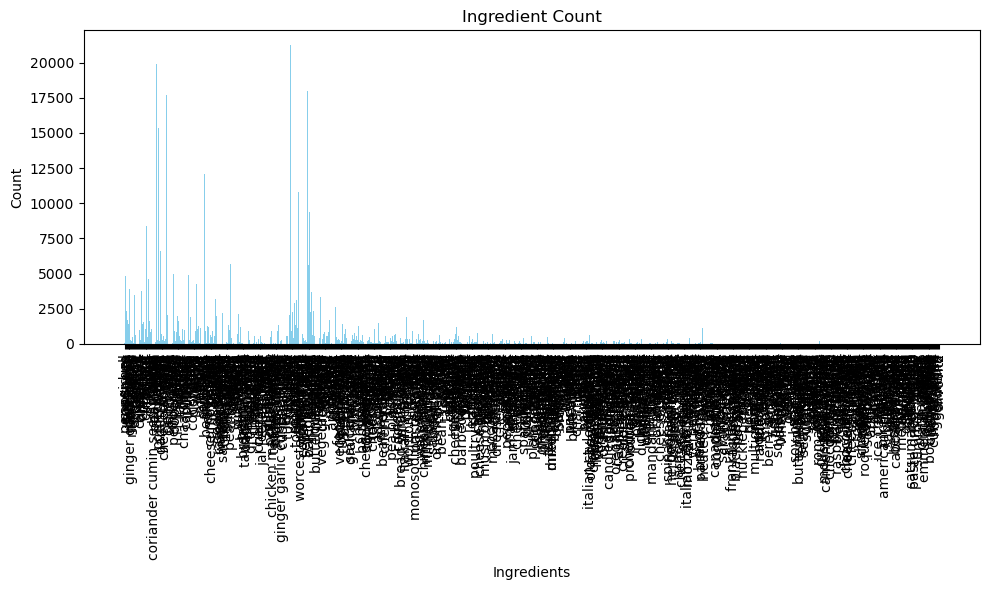

In [297]:
import matplotlib.pyplot as plt

# Assuming you have the dictionary dict_ingred_count containing ingredient counts

# Extracting keys and values from the dictionary
ingredients = list(dict_ingred_count.keys())
counts = list(dict_ingred_count.values())

# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.bar(ingredients, counts, color='skyblue')
plt.xlabel('Ingredients')
plt.ylabel('Count')
plt.title('Ingredient Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

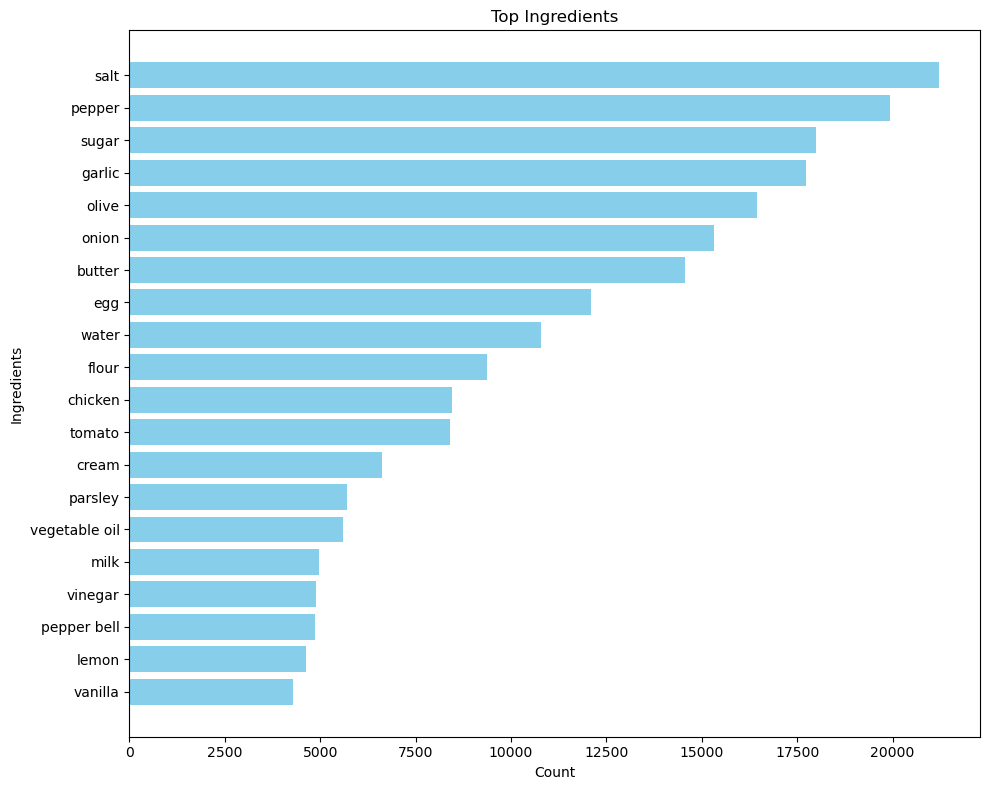

In [298]:
# Sort the dictionary by values in descending order
sorted_dict = dict(sorted(dict_ingred_count.items(), key=lambda item: item[1], reverse=True))

# Extracting top N ingredients and their counts
N = 20  # Adjust the number of ingredients to visualize
top_ingredients = list(sorted_dict.keys())[:N]
top_counts = list(sorted_dict.values())[:N]

# Creating a horizontal bar chart for the top ingredients
plt.figure(figsize=(10, 8))
plt.barh(top_ingredients, top_counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Ingredients')
plt.title('Top Ingredients')
plt.gca().invert_yaxis()  # Invert y-axis to show the ingredient with the highest count at the top
plt.tight_layout()
plt.show()

In [34]:
# Example dataset (list of transactions)
dataset = [['bread', 'milk', 'vegetables'],
           ['bread', 'milk', 'cheese'],
           ['bread', 'diapers', 'beer', 'eggs'],
           ['milk', 'diapers', 'beer', 'cola'],
           ['bread', 'milk', 'diapers', 'beer']]

# Convert dataset to DataFrame with one-hot encoding
df = pd.DataFrame(pd.Series(dataset), columns=['items'])
df_encoded = df['items'].str.join('|').str.get_dummies()

In [36]:
df_encoded
df

items
0     [bread, milk, vegetables]
1         [bread, milk, cheese]
2  [bread, diapers, beer, eggs]
3   [milk, diapers, beer, cola]
4  [bread, milk, diapers, beer]

In [235]:
n = len(grouped_dataset)
n

45749

In [299]:
# n = len(grouped_dataset)
# for value,row in grouped_dataset.iterrows():
   
#     ing_list=row['Ingredients'].split(',')
    
#     for ing in ing_list:
#         grouped_dataset['preparation_time'] = 5
#         # print(ing.strip())
#         # if ing.strip() == 'meat':
#         #     grouped_dataset['preparation_time'] = 45
#         if  ing.strip() == 'chicken' :
#             grouped_dataset['preparation_time'] = 45

grouped_dataset['preparation_time'] = 20

# # Loop through each row in the DataFrame
# for index, row in grouped_dataset.iterrows():
#     ing_list = [ingredient.strip() for ingredient in row['Ingredients'].split(',')]
#     len_o_i  = len(ing_list)
#     print(len_o_i)
#     if len_o_i < 4 :
#         grouped_dataset.at[index, 'preparation_time'] = 6
#     # Check if 'chicken' is in the ingredients list
#     if 'chicken' in ing_list or 'meat' in ing_list or 'beef' in ing_list:
#         grouped_dataset.at[index, 'preparation_time'] = 45
        

    # Loop through each row in the DataFrame
for index, row in grouped_dataset.iterrows():
    # Split the ingredients into a list and strip each element
    ing_list = [ingredient.strip() for ingredient in row['Ingredients'].split(',')]
    
    # Check if any of the specified ingredients are in the ingredients list
    if any(ingredient in ing_list for ingredient in ['meat', 'chicken', 'beef', 'egg', 'milk']):
        grouped_dataset.at[index, 'preparation_time'] = 45
    else:
        # Set preparation time to a random value between 5 and 20
        grouped_dataset.at[index, 'preparation_time'] = random.randint(5, 20)

   

In [300]:
grouped_dataset.sample(50)

Recipe ID                                        Ingredients  \
28085      28096  butter , buttermilk , lime , pineapple , sugar...   
11835      11838  allspice , butter , cardamom , cinnamon , flou...   
22180      22186  carrot , chicken , haricot  bean, leek , olive...   
43690      43713  carrot , celery , cherry tomato , chive , crea...   
44485      44508  butter , cilantro , eggplant , garlic , ginger...   
24459      24466  baking powder , butter , cheese ricotta , egg ...   
33912      33930  baking soda , butter , chocolate , chocolate h...   
37631      37653        butter , butternut squash , walnut , water    
42275      42298  brandy , cream , egg , egg , milk , nutmeg , r...   
20011      20016  coriander , curry leaf , ginger , red chile , ...   
43062      43085  baking powder , butter , buttermilk , chocolat...   
23649      23655  bread , cheese , cheese ricotta , egg , flour ...   
21940      21946  basil , bay leaf , eggplant , garlic , olive ,...   
25406      25413  cooking spray , fennel , fennel , lemon , lemo...   
9684        9686  basil , garlic , olive , onion , onion , orega...   
21980      21986  olive , onion , parsley , salt pepper , tomato...   
23769      23776  basil , hard  wheat, mozzarella  cheese, olive...   
15093      15096  banana , cake mix , coconut , pineapple , pudd...   
11383      11386  bacon , chicken , cream , garlic , kale , onio...   
10987      10989  baking mix , cheese , cream , egg , italian st...   
24721      24728  cheese gruyere , chicken , chive , cream , egg...   
34648      34666  macadamia nut , onion , onion , pepper , peppe...   
40268      40291  beef , butter , celery , flour , garlic , leek...   
44835      44858  cucumber , dressing ranch, lemon juice , olive...   
24635      24642  butter , chicken , cream , flour , garlic , pa...   
31250      31266  brandy , cinnamon , lemon juice , lime , merlo...   
5376        5378  avocado , cilantro , cucumber , garlic , lemon...   
24471      24478  basil , garlic , onion , onion , pancetta , pa...   
17475      17479  bay leaf , bean red , cayenne , celery , cumin...   
9491        9493  basil , garlic , olive , pepper , vinegar , zu...   
41300      41323  butter , cinnamon , egg , egg , flour , ginger...   
14815      14818  adobo sauce , bean , beer , celery , garlic , ...   
27536      27546  butter , chocolate , cocoa , flour , salt , su...   
5340        5342  chocolate , chocolate , milk condensed , toppi...   
17636      17640  butter , butter bean , garlic , okra , onion ,...   
29945      29960  basil , cheese , garlic , olive , pepper , pep...   
37186      37208  avocado , avocado , bean , cheese feta , cilan...   
13464      13467  butter , butter , egg , flour , milk , salt , ...   
41101      41124  basil , bean , chicken , garlic , garlic , lem...   
32480      32497  butter , cheese cream , chocolate , lemon juic...   
3894        3896  bean green , eggplant , garlic , olive , onion...   
45229      45252  anchovy , basil , caper , cedar , garlic , mon...   
21909      21914  clam , crab , horseradish , ketchup , lime , m...   
22942      22948  baguette , basil , garlic , olive , salt , tom...   
39864      39887  chicken , garlic , olive , onion , parmesan  c...   
7905        7907  almond , banana , coconut milk , ice cream , l...   
37918      37940  cheese feta , cucumber , lettuce , olive , oli...   
5781        5783  adobo sauce , bay leaf , beef , beef , cider v...   
7333        7335  avocado , bean , cilantro , corn , garlic , ja...   
4948        4950  avocado , crabmeat , cucumber , mayonnaise , r...   

                                                   Title              Cuisine  \
28085  Vanilla Roasted Pineapple with Buttermilk Sherbet                  USA   
11835                   Burrebrede (Scottish Shortbread)        British Isles   
22180                           Provencal Vegetable Soup               France   
43690                          Ranch Dip with Vegetables     

In [301]:

# Initialize a new column for difficulty level
grouped_dataset['difficulty_level'] = ''

# Loop through each row in the DataFrame
for index, row in grouped_dataset.iterrows():
    # Split the ingredients into a list and strip each element
    ing_list = [ingredient.strip() for ingredient in row['Ingredients'].split(',')]
    
    # Check ingredients for determining difficulty level
    if any(ingredient in ing_list for ingredient in ['meat', 'chicken', 'beef', 'egg', 'milk']):
        # If any of these ingredients are present, set difficulty to hard
        grouped_dataset.at[index, 'difficulty_level'] = 'hard'
    elif 'pasta' in ing_list or 'rice' in ing_list:
        # If pasta or rice are present, set difficulty to medium
        grouped_dataset.at[index, 'difficulty_level'] = 'medium'
    else:
        # Otherwise, set difficulty to easy
        grouped_dataset.at[index, 'difficulty_level'] = 'easy'

In [302]:
grouped_dataset

Recipe ID                                        Ingredients  \
0              1    capsicum , pepper bell , soy sauce , sunflower    
1              2  buttermilk , cumin , fenugreek , ginger garlic...   
2              3  asafoetida , cayenne , fenugreek , ginger garl...   
3              4  butter , cardamom , cashew , cayenne , cinnamo...   
4              5                    curry leaf , lemon , sunflower    
...          ...                                                ...   
45744      45768              half half , ice , strawberry , syrup    
45745      45769  baking soda , butter , cocoa powder , coffee ,...   
45746      45770  butter , butternut squash , corn , leek , oliv...   
45747      45771  almond , butter , flour , ice cream , nectarin...   
45748      45772  chicken , chicken , cornstarch , milk , milk ,...   

                                                  Title              Cuisine  \
0                          5 spice vegetable fried rice  Indian Subcontinent   
1                                          aachar aaloo  Indian Subcontinent   
2                            aadu lassan keri nu athanu  Indian Subcontinent   
3                                           aaloo kofta  Indian Subcontinent   
4                                   aaloo tamatar subzi  Indian Subcontinent   
...                                                 ...                  ...   
45744                       Strawberries & Cream Frappé                  USA   
45745                      Chocolate Whiskey Bundt Cake                  USA   
45746  Wild Rice with Butternut Squash, Leeks, and Corn                  USA   
45747                                     Fruit Crumble                  USA   
45748                       Enlightened Chicken Pot Pie                  USA   

       preparation_time difficulty_level  
0                    17             easy  
1                    19             easy  
2                    15             easy  
3                    11             easy  
4                    11             easy  
...                 ...              ...  
45744                10             easy  
45745                45             hard  
45746                15             easy  
45747                17             easy  
45748                45             hard  

[45749 rows x 6 columns]

In [303]:
# Add a new column named 'rating' to store the ratings
grouped_dataset['rating'] = ''

# Loop through each row in the DataFrame
for index, row in grouped_dataset.iterrows():
    # Set a random rating between 1 and 5
    grouped_dataset.at[index, 'rating'] = random.randint(1, 5)

In [310]:
grouped_dataset.to_csv('finalised_dataset.csv')

In [335]:
ml_dataset = grouped_dataset[['Ingredients','Title']]

In [336]:
# ml_dataset['Ingredients']
for index, rows in ml_dataset:
    Inredients_list = rows['Ingredients'].split(',')
    
    

Ingredients  \
0        capsicum , pepper bell , soy sauce , sunflower    
1      buttermilk , cumin , fenugreek , ginger garlic...   
2      asafoetida , cayenne , fenugreek , ginger garl...   
3      butter , cardamom , cashew , cayenne , cinnamo...   
4                        curry leaf , lemon , sunflower    
...                                                  ...   
45744              half half , ice , strawberry , syrup    
45745  baking soda , butter , cocoa powder , coffee ,...   
45746  butter , butternut squash , corn , leek , oliv...   
45747  almond , butter , flour , ice cream , nectarin...   
45748  chicken , chicken , cornstarch , milk , milk ,...   

                                                  Title  
0                          5 spice vegetable fried rice  
1                                          aachar aaloo  
2                            aadu lassan keri nu athanu  
3                                           aaloo kofta  
4                                   aaloo tamatar subzi  
...                                                 ...  
45744                       Strawberries & Cream Frappé  
45745                      Chocolate Whiskey Bundt Cake  
45746  Wild Rice with Butternut Squash, Leeks, and Corn  
45747                                     Fruit Crumble  
45748                       Enlightened Chicken Pot Pie  

[45749 rows x 2 columns]

In [304]:
grouped_dataset

Recipe ID                                        Ingredients  \
0              1    capsicum , pepper bell , soy sauce , sunflower    
1              2  buttermilk , cumin , fenugreek , ginger garlic...   
2              3  asafoetida , cayenne , fenugreek , ginger garl...   
3              4  butter , cardamom , cashew , cayenne , cinnamo...   
4              5                    curry leaf , lemon , sunflower    
...          ...                                                ...   
45744      45768              half half , ice , strawberry , syrup    
45745      45769  baking soda , butter , cocoa powder , coffee ,...   
45746      45770  butter , butternut squash , corn , leek , oliv...   
45747      45771  almond , butter , flour , ice cream , nectarin...   
45748      45772  chicken , chicken , cornstarch , milk , milk ,...   

                                                  Title              Cuisine  \
0                          5 spice vegetable fried rice  Indian Subcontinent   
1                                          aachar aaloo  Indian Subcontinent   
2                            aadu lassan keri nu athanu  Indian Subcontinent   
3                                           aaloo kofta  Indian Subcontinent   
4                                   aaloo tamatar subzi  Indian Subcontinent   
...                                                 ...                  ...   
45744                       Strawberries & Cream Frappé                  USA   
45745                      Chocolate Whiskey Bundt Cake                  USA   
45746  Wild Rice with Butternut Squash, Leeks, and Corn                  USA   
45747                                     Fruit Crumble                  USA   
45748                       Enlightened Chicken Pot Pie                  USA   

       preparation_time difficulty_level rating  
0                    17             easy      5  
1                    19             easy      4  
2                    15             easy      3  
3                    11             easy      4  
4                    11             easy      2  
...                 ...              ...    ...  
45744                10             easy      4  
45745                45             hard      2  
45746                15             easy      3  
45747                17             easy      3  
45748                45             hard      1  

[45749 rows x 7 columns]

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named grouped_dataset with 'title' and 'Ingredients' columns

# Initialize a list to store the unique ingredients
unique_ingredients = []

# Extract unique ingredients from the DataFrame
for ingredients in ml_dataset['Ingredients']:
    unique_ingredients.extend(ingredients.split(','))

# Remove leading and trailing whitespace and get unique ingredients
unique_ingredients = list(set([ingredient.strip() for ingredient in unique_ingredients]))

# Create a list to store dictionaries representing each dish's ingredient presence
ingredient_presence_list = []
for index,rows in ml_dataset.iterrows():
    Inredients_list = rows['Ingredients'].split(',')
    title_ingredient_presence = {rows['Title']: ''}
    ml_dataset.at[index,'Ingredients'] = rows['Ingredients'].split(',')
    
    
#     for ingredient in unique_ingredients:
#         title_ingredient_presence[ingredient] = 1 if ingredient.strip() in title_ingredients else 0
     
#     ml_dataset.at[index,'Ingredients'] = rows['Ingredients'].split(',')
# # Iterate over each unique title
# for title in grouped_dataset['Title'].unique():
#     # Extract ingredients for the current title
#     title_ingredients = set(ml_dataset['Ingredients'].iloc[0].split(','))
#     # Initialize a dictionary to store ingredient presence for the current title
#     title_ingredient_presence = {'Title': title}
#     # Mark the presence of each ingredient in the current title
#     for ingredient in unique_ingredients:
#         title_ingredient_presence[ingredient] = 1 if ingredient.strip() in title_ingredients else 0
#     # Append the dictionary to the ingredient_presence_list
#     ingredient_presence_list.append(title_ingredient_presence)

# # Create a DataFrame from the list of dictionaries
# ingredient_presence_df = pd.DataFrame(ingredient_presence_list)

# # Display the resulting DataFrame
# print(ingredient_presence_df)


In [351]:
import pandas as pd

# Assuming you have a DataFrame named ml_dataset with 'Title' and 'Ingredients' columns

# Initialize a list to store the unique ingredients
unique_ingredients = []

# Extract unique ingredients from the DataFrame
for ingredients in ml_dataset['Ingredients']:
    unique_ingredients.extend(ingredients.split(','))

# Remove leading and trailing whitespace and get unique ingredients
unique_ingredients = list(set([ingredient.strip() for ingredient in unique_ingredients]))
unique_ingredients
# Create a DataFrame to store the presence of each ingredient in each dish
ingredient_presence_list = []

# Iterate over each row in the DataFrame
for index, row in ml_dataset.iterrows():
    # Initialize a dictionary to store ingredient presence for the current dish
    dish_ingredient_presence = {'Title': row['Title']}
    # Split ingredients for the current dish
    # dish_ingredients = row['Ingredients'].split(',').strip()
    dish_ingredients = [ingredient.strip() for ingredient in row['Ingredients'].split(',')]
    
    for ingredient in unique_ingredients:
        dish_ingredient_presence[ingredient] = 1 if ingredient.strip() in dish_ingredients else 0
    #  Append the dictionary to the ingredient_presence_list
    ingredient_presence_list.append(dish_ingredient_presence)
# # Create a DataFrame from the list of dictionaries
# ingredient_presence_df = pd.DataFrame(ingredient_presence_list)

# #     # Mark the presence of each ingredient in the current dish
# #     for ingredient in unique_ingredients:
# #         dish_ingredient_presence[ingredient] = 1 if ingredient.strip() in dish_ingredients else 0
# #     # Append the dictionary to the ingredient_presence_list
# #     ingredient_presence_list.append(dish_ingredient_presence)

# Create a DataFrame from the list of dictionaries
ingredient_presence_df = pd.DataFrame(ingredient_presence_list)
# Reorder the DataFrame columns
ingredient_presence_df = ingredient_presence_df[['Title'] + unique_ingredients]
# Reorder the DataFrame columns
ingredient_presence_df = ingredient_presence_df[['Title'] + unique_ingredients]

# # Display the resulting DataFrame
# print(ingredient_presence_df)


In [352]:
ingredient_presence_df.to_csv('ingredient_presence_df.csv')

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named grouped_dataset with 'title' and 'Ingredients' columns

# Initialize a list to store the unique ingredients
unique_ingredients = []

# Extract unique ingredients from the DataFrame
for ingredients in grouped_dataset['Ingredients']:
    unique_ingredients.extend(ingredients.split(','))

# Remove leading and trailing whitespace and get unique ingredients
unique_ingredients = list(set([ingredient.strip() for ingredient in unique_ingredients]))

# Create a DataFrame to store the presence of each ingredient in each dish
ingredient_presence_df = pd.DataFrame(columns=['title'] + unique_ingredients)

# Iterate over each unique title
for title in grouped_dataset['title'].unique():
    # Extract ingredients for the current title
    title_ingredients = set(grouped_dataset[grouped_dataset['title'] == title]['Ingredients'].iloc[0].split(','))
    # Initialize a dictionary to store ingredient presence for the current title
    title_ingredient_presence = {'title': title}
    # Mark the presence of each ingredient in the current title
    for ingredient in unique_ingredients:
        title_ingredient_presence[ingredient] = 1 if ingredient.strip() in title_ingredients else 0
    # Append the dictionary to the ingredient_presence_df
    ingredient_presence_df = ingredient_presence_df.append(title_ingredient_presence, ignore_index=True)

# Display the resulting DataFrame
print(ingredient_presence_df)


In [308]:
ingredient_presence_df

Title  potato  blackfish  \
0                          5 spice vegetable fried rice       0          0   
1                                          aachar aaloo       0          0   
2                            aadu lassan keri nu athanu       0          0   
3                                           aaloo kofta       0          0   
4                                   aaloo tamatar subzi       0          0   
...                                                 ...     ...        ...   
44416                       Strawberries & Cream Frappé       0          0   
44417                      Chocolate Whiskey Bundt Cake       0          0   
44418  Wild Rice with Butternut Squash, Leeks, and Corn       0          0   
44419                                     Fruit Crumble       0          0   
44420                       Enlightened Chicken Pot Pie       0          0   

       rabbit  oregano  gooseberry  worcestershire sauce  vegetable stock  \
0           0        0           0                     0                0   
1           0        0           0                     0                0   
2           0        0           0                     0                0   
3           0        0           0                     0                0   
4           0        0           0                     0                0   
...       ...      ...         ...                   ...              ...   
44416       0        0           0                     0                0   
44417       0        0           0                     0                0   
44418       0        0           0                     0                0   
44419       0        0           0                     0                0   
44420       0        0           0                     0                0   

       chayote  bream  ...  rocket  salad  ice cream  ostrich  mullet  spelt  \
0            0      0  ...              0          0        0       0      0   
1            0      0  ...              0          0        0       0      0   
2            0      0  ...              0          0        0       0      0   
3            0      0  ...              0          0        0       0      0   
4            0      0  ...              0          0        0       0      0   
...        ...    ...  ...            ...        ...      ...     ...    ...   
44416        0      0  ...              0          0        0       0      0   
44417        0      0  ...              0          0        0       0      0   
44418        0      0  ...              0          0        0       0      0   
44419        0      0  ...              0          0        0       0      0   
44420        0      0  ...              0          0        0       0      0   

       apple sauce  meringue  tandoori paste  grape  cheese blue  
0                0         0               0      0            0  
1                0         0               0      0            0  
2                0         0               0      0            0  
3                0         0               0      0            0  
4                0         0               0      0            0  
...            ...       ...             ...    ...          ...  
44416            0         0               0      0            0  
44417            0         0               0      0            0  
44418            0         0               0      0            0  
44419            0         0               0      0            0  
44420            0         0               0      0            0  

[44421 rows x 866 columns]

In [309]:
ingredient_presence_df.to_csv('ing_1_0.csv')

In [ ]:
grouped_dataset['preparation_time'].to_csv('prpn_time3.csv')

In [138]:
unique_ingredients = set(grouped_dataset['Ingredients'])


In [ ]:
# Extracting unique ingredients
unique_ingredients = set(','.join(grouped_dataset['Ingredients']).split(','))

# Creating a new DataFrame with dish names as index
result_df = pd.DataFrame(index=grouped_dataset['Title'])

# Adding columns for each unique ingredient
for ingredient in unique_ingredients:
    result_df[ingredient] = 0

# Marking presence of ingredients in each dish
for index, row in grouped_dataset.iterrows():
    ingredients_list = row['Ingredients'].split(',')
    for ingredient in ingredients_list:
        result_df.at[row['ingredient'], ingredient.strip()] = 1

# Displaying the result DataFrame
print(result_df)

In [153]:
result_df.to_csv('result.csv')

In [139]:
# Splitting the ingredients by comma and combining them into a single list
all_ingredients = ','.join(grouped_dataset['Ingredients']).split(',')

# # Splitting the ingredients by comma and combining them into a single list
# all_ingredients = ','.join(recipes_df['Ingredients']).split(',')

# # Extracting unique ingredients
# unique_ingredients = set(all_ingredients)
unique_ingredients = set(all_ingredients)

In [140]:
# Create a new DataFrame to store unique ingredients
unique_ingredients_df = pd.DataFrame(unique_ingredients, columns=['Unique Ingredients'])

# Display the DataFrame with unique ingredients
unique_ingredients_df

Unique Ingredients
0             bouillon 
1                syrup 
2                cocoa 
3      cajun seasoning 
4             bean red 
...                 ...
1346          pheasant 
1347         soy sauce 
1348         hushpuppy 
1349     cooking spray 
1350      pike northern

[1351 rows x 1 columns]

In [ ]:
unique_ingredients_df.to_csv('IU.csv')

In [ ]:
# Assuming you have loaded your datasets into DataFrames called 'dataset1_df' and 'dataset2_df'

# Specify the columns you want to compare
column_to_compare_dataset1 = 'Unique Ingredients'
column_to_compare_dataset2 = 'Ingredient Name'

# Get unique values from the column in dataset2
unique_values_dataset2 = set(combined_Ingredients_dataset[column_to_compare_dataset2])

# Check if elements in dataset1 column exist in dataset2 column
unique_ingredients_df['Exist_in_dataset2'] = unique_ingredients_df[column_to_compare_dataset1].apply(
    lambda x: x in unique_values_dataset2)

# Display the updated dataset1 DataFrame
unique_ingredients_df.to_csv('validate.csv')

In [141]:
# Convert values in specified columns to lowercase for case-insensitive comparison
combined_Ingredients_dataset['Ingredient Name'] = combined_Ingredients_dataset['Ingredient Name'].str.lower()
unique_ingredients_df['Unique Ingredients'] = unique_ingredients_df['Unique Ingredients'].str.lower()

# Merge the two datasets on the specified columns
merged_datasets = pd.merge(combined_Ingredients_dataset, unique_ingredients_df, how='inner', left_on='Ingredient Name', right_on='Unique Ingredients')

# Check if there are any matching values and create a new column indicating the match status
merged_datasets['Match_Status'] = 'Match' if not merged_datasets.empty else 'No Match'

# # Check if there are any matching values
# if merged_datasets.empty:
#     print("No matching values found.")
# else:
#     print("Matching values found.")
#     print(merged_datasets)

In [143]:
merged_datasets.to_csv('matched.csv')

In [ ]:
len(unique_ingredients)

In [ ]:
# grouped_dataset['Ingredients'])
grouped_dataset= grouped_dataset['Ingredients'].apply(lambda x: set(x.split(',')))

In [ ]:
grouped_dataset

In [147]:

# Split the 'Aliased Ingredient Name' values by commas and flatten the list
all_ingredients = [ingredient.strip() for ingredients in grouped_dataset['Ingredients'].str.split(',') for ingredient in ingredients]

# Create a DataFrame with unique ingredients
unique_ingredients_df = pd.DataFrame({'Unique_Ingredients': list(set(all_ingredients))})


In [148]:
unique_ingredients_df

Unique_Ingredients
0                 mate
1             broccoli
2     emmental  cheese
3            aubergine
4         puff  potato
..                 ...
860     cheese cheddar
861               lamb
862               okra
863         peppermint
864        soybean oil

[865 rows x 1 columns]

In [ ]:
len(all_ingredients),all_ingredients

In [ ]:
unique_ingredients_df

In [ ]:
# Merge the datasets on 'Aliased Ingredient Name'
merged_dataset = pd.merge(unique_ingredients_df, Ingredients_df[['Aliased Ingredient Name', 'Category']], left_on='Unique_Ingredients', right_on='Aliased Ingredient Name', how='left')

# Drop the duplicated 'Aliased Ingredient Name' column
merged_dataset = merged_dataset.drop('Aliased Ingredient Name', axis=1)


In [ ]:
merged_dataset

In [354]:
!pip install faker

  Obtaining dependency information for faker from https://files.pythonhosted.org/packages/cb/f4/0f8391297cdd8fdf15cac9895b844514024bc4d784023419d4ad9d6acf50/Faker-23.1.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 667.8 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.7 MB 2.0 MB/s eta 0:00:01
   -------- ------------------------------- 0.4/1.7 MB 2.6 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/1.7 MB 2.6 MB/s eta 0:00:01
   ------------- -------------------------- 0.6/1.7 MB 2.3 MB/s eta 0:00:01
   -------------- ------------------------- 0.6/1.7 MB 2.2 MB/s eta 0:00:01
   ------------------- -------------------- 0.8/1.7 MB 2.4 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.7 MB 2.6 MB/s eta 0:00:01
   --------------------------- ------------ 1.2/1.7 MB 2

In [2]:
from faker import Faker

In [3]:
# Initialize Faker to generate synthetic data
fake = Faker()

In [6]:
# vendor_data_df = []
vendor_data_df = pd.DataFrame({
    'Vendor_ID': [fake.random_number(digits=5) for _ in range(100)],
    'Vendor_Name': [fake.company() for _ in range(100)],
    'Location': [fake.city() for _ in range(100)]
})

In [359]:
vendor_data_df

Vendor_ID                   Vendor_Name             Location
0       86234                Carrillo-Garza     Port Michaelbury
1        9414                   Chavez-Long             Kingfurt
2       48095               Duarte-Martinez       Nicholeborough
3       91622                Johnson-Jordan       South Loriberg
4       43359                 Jensen-Harris          Lake Darryl
..        ...                           ...                  ...
95      60365                   Edwards Ltd  North Joanneborough
96      47526   Graham, Fernandez and Jones             Meganton
97      87396  Wiggins, Bernard and Johnson         West Caitlin
98      14264                  Munoz-French      West Brandyfurt
99      52658        Martin, Frye and Huynh       East Troymouth

[100 rows x 3 columns]

In [395]:
# purchase_dfhistory_df = []
# Generate synthetic purchase history
purchase_history_df = pd.DataFrame({
    'Transaction_ID': [fake.random_number(digits=6) for _ in range(combined_Ingredients_dataset.shape[0])],
    'Vendor_ID': [fake.random_element(elements=vendor_data_df['Vendor_ID']) for _ in range(combined_Ingredients_dataset.shape[0])],
    'Product_Name': [row['Ingredient Name'] for index, row in combined_Ingredients_dataset.iterrows()],
    'Quantity': [row['StockQuantity'] for index, row in combined_Ingredients_dataset.iterrows()],
    'Amount': [price * quantity for price, quantity in zip(combined_Ingredients_dataset['Price'].str.replace('$', '').astype(int), combined_Ingredients_dataset['StockQuantity'])]
})

In [396]:
purchase_history_df

Transaction_ID  Vendor_ID   Product_Name  Quantity  Amount
0             721711      37420            egg        81     324
1             666276      37420          bread        92     552
2              49524      47526      rye bread        91     819
3             998035      47526  wheaten bread        60     480
4             478095      31088    white bread         4      44
...              ...        ...            ...       ...     ...
1028          377291      18058         rabbit        82    1148
1029          744003       3447        haddock        46     138
1030           12002      21263      persimmon        12     216
1031           13584      17629    apple sauce        85    1360
1032          816476      12755  cider vinegar        12      84

[1033 rows x 5 columns]

In [ ]:
# Assuming combined_Ingredients_dataset is your DataFrame
# Using list comprehension to iterate over rows and columns and store the results in a list
result_list = [(row['Ingredient Name'], column_name, column_value) for _, row in combined_Ingredients_dataset.iterrows() for column_name, column_value in row.iteritems()]

[row['Ingredient Name'] for index, row in combined_Ingredients_dataset.iterrows()]

# Print the list
print(result_list)
[price * quantity for price, quantity in zip(combined_Ingredients_dataset['Price'], combined_Ingredients_dataset['StockQuantity'])]

Ingredient Name	Entity ID	Category	Price	StockQuantity


In [361]:
purchase_dfhistory_df

Transaction_ID  Vendor_ID Product_Name  Quantity  Amount
0            432447      82832         part        22    5356
1            928443      99716       pretty        14    6024
2            931063      91591      prepare        43    8377
3            997026      90650          son        29    1732
4            390854       8215           do        18    2240
..              ...        ...          ...       ...     ...
195          779975      26920         form        91    6152
196          444628      59792          car        54    7179
197          308734      83077       though        41    7176
198          535579      66185      central        87     295
199           13807      63978          top         5    6658

[200 rows x 5 columns]

In [362]:
# product_demand_df = []
# Generate synthetic product demand data
product_demand_df = pd.DataFrame({
    'Product_Name': [fake.word() for _ in range(50)],
    'Demand_Score': [fake.random_number(digits=2) for _ in range(50)]
})

In [363]:
product_demand_df

Product_Name  Demand_Score
0            each            78
1         mission            38
2           power            63
3        thousand            80
4        increase            41
5            take            14
6          accept            29
7            seem            84
8     environment             5
9            tell            84
10           whom            54
11         nearly            89
12        teacher            79
13  international            34
14         behind            85
15           data            47
16        certain            20
17          story            37
18          stage            47
19            bed            52
20   relationship            78
21           area            97
22           when            94
23           they            21
24            fly            61
25         itself            52
26           onto            23
27     individual            32
28          thing            44
29           mean            30
30            sea            82
31           same            10
32         theory            53
33      direction            82
34       positive            79
35          coach             1
36        network             8
37           real            35
38          visit            10
39         threat            97
40           part            44
41           role            47
42           talk            44
43           whom             1
44          quite            52
45          write            39
46            per            69
47        billion            26
48           must            73
49         family            32

## Generating user info dataset 

### Importing user data

In [3]:
user_data = pd.read_csv("Dataset/User_Interaction_Data.csv")

In [4]:
user_data.head()

User ID  Sessions Initiated  Average Time per Session (min)  \
0        1                   5                           27.35   
1        2                  28                            8.27   
2        3                  14                           23.49   
3        4                   8                           10.39   
4        5                  39                           21.96   

                                    Favorite Recipes Last Purchase  
0                         Placek, Flo's Clams Casino    2023-06-30  
1                      Fried Sweet Potato Hashbrowns    2023-07-20  
2  Scalloped Potatoes with Ham, World Famous Rend...    2023-01-14  
3               Rustic Apple Pie with Dried Cherries    2023-05-19  
4  Herb-Marinated Squid, Mashed Potatoes with Ran...    2023-05-11

In [8]:
fake = Faker() 
print (fake.email()) 
print(fake.country()) 
print(fake.name()) 

meagan83@example.org
Palau
William Anderson


In [19]:
def FakeName():
    return fake.name()

In [31]:
def FakeEmail(name):
    name = str.lower(name)
    email_format = ['gmail.com', 'yahoo.com', 'mylambton.ca', 'hotmail.com']
    index = random.randint(0, len(email_format)-1)
    email = ".".join(name.split()) + "@" + email_format[index]
    return email

In [34]:
def FakeAge():
    return random.randint(16, 70)

In [14]:
user_details_db = user_data.copy()
user_details_db = user_details_db[["User ID"]]

In [18]:
user_details_db.head()

User ID
0        1
1        2
2        3
3        4
4        5

In [26]:
# Generating fake name
user_details_db['User Name'] = user_details_db['User ID'].apply(lambda x: FakeName())

In [32]:
# Generating fake email
user_details_db['User Email'] = user_details_db['User Name'].apply(lambda x: FakeEmail(x))

In [35]:
# Generating fake age
user_details_db['User Age'] = user_details_db['User ID'].apply(lambda x: FakeAge())

In [36]:
user_details_db

User ID          User Name                     User Email  User Age
0            1  Rebecca Rodriguez    rebecca.rodriguez@yahoo.com        32
1            2   Richard Richmond   richard.richmond@hotmail.com        36
2            3      Tamara Morris     tamara.morris@mylambton.ca        24
3            4      Emily Rodgers     emily.rodgers@mylambton.ca        41
4            5           Tony Ray           tony.ray@hotmail.com        37
...        ...                ...                            ...       ...
15244    15245    Cynthia Hoffman    cynthia.hoffman@hotmail.com        44
15245    15246   Kenneth Thompson  kenneth.thompson@mylambton.ca        43
15246    15247      Allison Hanna        allison.hanna@yahoo.com        17
15247    15248     Gabriel Cannon       gabriel.cannon@gmail.com        19
15248    15249         Cody Hicks         cody.hicks@hotmail.com        30

[15249 rows x 4 columns]

In [37]:
user_details_db.to_csv("Dataset/User_Details_Data.csv", index= False)

In [39]:
user_details_db.to_json("User_Details_Data.json", index= False)

## Updating user Details Data

In [2]:
user_data = pd.read_csv("Dataset/User_Details_Data.csv")

In [3]:
def FakeAge():
    return random.randint(16, 70)

In [6]:
# Generating fake age
user_data['User Age'] = user_data['User ID'].apply(lambda x: FakeAge())

In [7]:
user_data.head()

User ID          User Name                    User Email  User Age
0        1  Rebecca Rodriguez   rebecca.rodriguez@yahoo.com        60
1        2   Richard Richmond  richard.richmond@hotmail.com        53
2        3      Tamara Morris    tamara.morris@mylambton.ca        19
3        4      Emily Rodgers    emily.rodgers@mylambton.ca        42
4        5           Tony Ray          tony.ray@hotmail.com        39

In [8]:
user_data.to_csv("Dataset/User_Details_Data.csv", index= False)